### Partial Differential equations (PDEs)

* multiple indpendent variables

#### Classification
* General 2nd order quasi-linear: 
$$A(x,y) \frac{\partial^2 u}{\partial x^2}+2B(x,y) \frac{\partial^2 u}{\partial x \partial y}+C(x,y) \frac{\partial^2 u}{\partial y^2} = F(x,y,u, \frac{\partial u}{\partial x}, \frac{\partial u}{\partial y})$$

Notation: 
- Use $x,y,z, \text{and } t$ as independent variables (with $u,v,w$ as independent parametric variables)
- Designate dependent variable as $u,v,w,\psi$, or $\omega$
- Use subscripts (sometimes preceded by a comma) as shorthand for partial derivatives
- Equation above abbreviates to:
$$A(x,y) \, u_{xx}+2B(x,y) \, u_{xy}+C(x,y) \, u_{yy} = F(x,y,u, u_x, u_y)$$
- __Constant coefficients__ $\implies$ PDE further simplifies to:
$$A  u_{xx}+2B  u_{xy}+C  u_{yy} = F(x,y,u, u_x, u_y)$$

**Characteristic solution:** $u = f(k x + y)$.

 With chain rule: $$u_x = k f', u_y = f'$$
 Plug into PDE: $$A k^2 f'' +2 B k f'' + C f'' = 0$$
 Results in quadratic euqation: $$A k^2 + 2 B k + C = 0$$

 Major distinction involves whether quadratic has real roots

 Existance of real characteristics determined by the **discriminant:** $B^2 - A C$




|   Type        |     Discriminant Value      |   Classic Example   |      Classic Equation    |    Normal Form Equation   |
| -------- | :------------------: | :--------: | :-------------: | :--------------: |
| Hyperbolic     |  $B^2-A C>0$  | Wave |  $u_{tt} = c^2 u_{xx}$     | $u_{vw} = f_1$ |
| Parabolic      |  $B^2-A C=0$  | Heat |  $u_{t} = c^2 u_{xx}$     | $u_{ww} = f_2$ |
| Elliptic      |  $B^2-A C<0$  | Laplace |  $u_{xx} + u_{yy} = 0$     | $u_{vv}+u_{ww} = f_3$ |

Different classes of equations have different properties that require choosing appropriate numerical methods.

#### Laplace's equation
* Gravitation, electrostatics, fluid flow, many thigns with potential
* Model for diffusion: temperatute, chemical concentrations, etc

$$ \nabla^2 u = \frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = 0 \text{ on } x \in [0,L_x]; \; y \in [0,L_y]$$

with boundary conditions:

$$u(0,y)=u(L_x,y)=u(x,0)=0, \; u(x,L_y) = U$$

To solve:

1. Discritize domain into n+2 points to account for boundary conditions
2. Replace derivatives in PDE with central difference approximations
3. This creates 5 point laplace stencil for classic stencil computation!

$$ \nabla^2 u = \frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} \rightarrow u_{i-1,j}+u_{i+1,j}+u_{i,j-1} + u_{i,j+1} -4u_{i,j} = 0$$

4. Solve for each point in grid by accounting for all neighbors

$$u_{i,j} = \frac{1}{4} (u_{i-1,j} + u_{i+1,j} +u_{i,j-1} +u_{i,j+1} )$$

5. Repeat until results converge!



[25.   12.5   7.81  5.47  4.69  4.03  3.49  3.05  2.7   2.4   2.16  1.95
  1.83  1.71  1.61  1.52  1.43  1.35  1.28  1.21  1.15  1.09  1.03  0.99
  0.95  0.92  0.89  0.85  0.83  0.8   0.77  0.74  0.72  0.7   0.67  0.65
  0.63  0.61  0.59  0.58  0.56  0.55  0.53  0.52  0.51  0.5   0.48  0.47
  0.46  0.45  0.44  0.43  0.42  0.41  0.4   0.39  0.38  0.37  0.36  0.36]


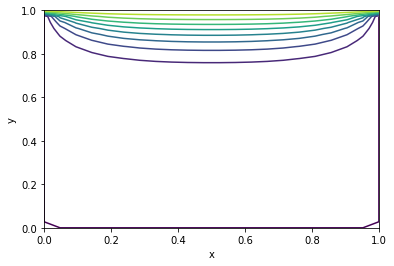

In [6]:
import numpy as np
from simple_plot import *

def mean_update(u):
    '''
    update 2D array with non-boundary elements replaced 
    by average of 4 nearest neighbors (on Cartesian grid)
    
    Args:
        u: 2D numpy array of floats
        
    Returns:
        u_new: numpy array with same shape as u
    '''
    #insert code here
    nx,ny = u.shape
    #u_new = np.zeros([nx,ny])
    u_new = np.copy(u)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u_new[i,j]=(u[i-1,j]+u[i+1,j]+
                        u[i,j-1]+u[i,j+1])/4.
    return u_new

#intialize discretization
Lx,Ly = 1,1
nx,ny = 35,20
x = np.linspace(0,Lx,nx + 2) #linspace across full domain including boundaries
y = np.linspace(0,Ly,ny + 2) #linspace across full domaindx = Lx/(nx+1) #spacing between nodes
dx,dy = Lx/(nx+1), Ly/(ny+1) #spacing between nodes
x_in, y_in = x[1:-1], y[-1:1] #coords of interior points

#intialize the 2D array
u = np.zeros([nx+2,ny+2]) #include boundary points
top_val = 100
u[0] = 100 #impose BCs
# termination parameters
tol = 1e-2
max_iter = 60
du = np.zeros(max_iter) # 1D array for change values
for k in range(max_iter):
    u_new = mean_update(u)
    du_max = np.max(np.abs(u-u_new))
    du[k] = du_max
    u = u_new
    if du_max < tol:
        break
np.set_printoptions(precision=2)
# print(u)
print(du)

arraycontourplot(1-x,y, u, levels=np.linspace(0,100,10),
    titlestring='', filled=False)

In [ ]:
### PDE Forms



In [ ]:
### Laplace direct solve

**Method:**

1. Collect discritized equations for the full grid
2. Construct one big system of equations for full grid of values (linear PDE -> linear system)
3. Recast problem into traditional $A x = b$
    * Will need to flatten $nxn$ array into 1D array

A is stencil matrix: 
x is matrix of unknowns of independent variable
b is matrix of non-homogeneous boundary values






In [ ]:
### Fourier Transform